In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np


In [2]:
df=pd.read_csv('final_data2.csv') # Load the dataset
df

,delay,truck_age,load_capacity_pounds,mileage_mpg,age,experience,ratings,average_speed_mph,distance,average_hours,...,city_description_y_Patchy light rain,city_description_y_Patchy light rain with thunder,city_description_y_Patchy light snow,city_description_y_Patchy moderate snow,city_description_y_Patchy rain possible,city_description_y_Patchy sleet possible,city_description_y_Patchy snow possible,city_description_y_Sunny,city_description_y_Thundery outbreaks possible,city_description_y_Torrential rain shower
0,0,9.0,3000.0,23.0,48.0,9.0,7.0,57.36,310.750000,6.2200,...,False,False,False,False,False,False,False,False,False,False
1,1,10.0,15000.0,27.0,45.0,8.0,3.0,60.05,1231.985998,24.6398,...,False,False,False,False,False,False,False,False,False,False
2,0,11.0,20000.0,26.0,50.0,7.0,8.0,60.50,1231.985998,24.6398,...,False,False,False,False,False,False,False,False,False,False
3,0,8.0,4000.0,28.0,53.0,22.0,9.0,63.94,1231.985998,24.6398,...,False,False,False,False,False,False,False,False,False,False
4,0,12.0,15000.0,23.0,52.0,18.0,7.0,56.28,1231.985998,24.6398,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12602,0,8.0,3000.0,24.0,44.0,9.0,3.0,59.04,1163.160000,23.2600,...,False,False,False,False,False,False,False,True,False,False
12603,1,8.0,15000.0,24.0,45.0,0.0,2.0,62.66,723.350000,14.4700,...,False,False,False,False,False,False,False,False,False,False
12604,0,13.0,6000.0,17.0,50.0,-7.0,4.0,35.20,420.950000,8.4200,...,False,False,False,False,False,False,False,False,False,False
12605,0,10.0,20000.0,16.0,43.0,12.0,6.0,57.07,113.100000,2.2600,...,False,False,False,False,False,False,False,True,False,False


In [3]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling, excluding the target column 'delay'

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('delay')
scaler = StandardScaler() # Scale numerical features using StandardScaler
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [4]:
# Define features and target variable
X = df.drop(columns=['delay'])  # Drop the target column
y = df['delay']                 # Target variable(delay)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Define the parameter distribution for RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for splits
    'max_depth': [10, 50, 100],        # Maximum depth of the tree
    'min_samples_split': [2, 5],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],    # Minimum number of samples required at a leaf node
    'bootstrap': [True]         # Whether bootstrap samples are used when building trees
}


In [6]:
# Perform RandomizedSearchCV to find the best hyperparameters

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,  # Reduce CV folds
    random_state=42,
    n_jobs=-1
)


In [7]:
# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and accuracy
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for predictions
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}
Random Forest Accuracy: 0.8184


                                              feature  importance
8                                       average_hours    0.072624
7                                            distance    0.062388
30                                  travel_time_hours    0.055971
25                                    city_humidity_y    0.040315
22                                        city_temp_y    0.033935
..                                                ...         ...
81             city_description_y_Heavy rain at times    0.000010
73          city_description_x_Torrential rain shower    0.000007
57  city_description_x_Moderate or heavy snow showers    0.000007
98  city_description_y_Moderate or heavy snow with...    0.000005
95  city_description_y_Moderate or heavy showers o...    0.000000

[116 rows x 2 columns]


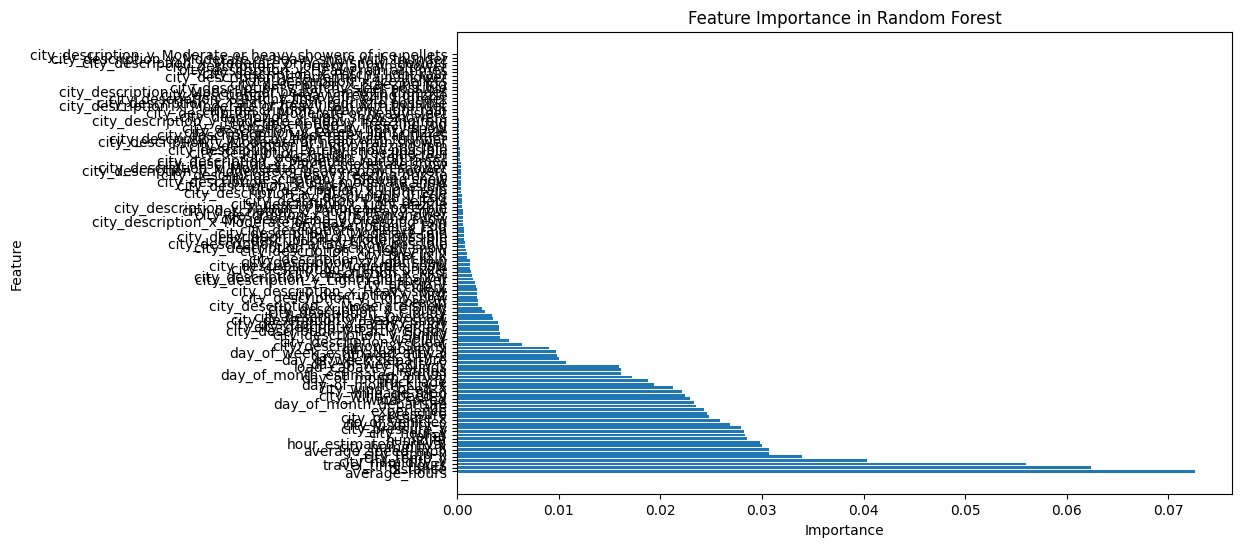

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model (for feature importance visualization)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Print out the features and their importance
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()


In [9]:
# Print the entire feature importances DataFrame without row limit

pd.set_option('display.max_rows', None)  
print(feature_importances)

                                               feature  importance
8                                        average_hours    0.072624
7                                             distance    0.062388
30                                   travel_time_hours    0.055971
25                                     city_humidity_y    0.040315
22                                         city_temp_y    0.033935
15                                         city_temp_x    0.030671
6                                    average_speed_mph    0.030662
18                                     city_humidity_x    0.030041
33                              hour_estimated_arrival    0.029811
12                                            humidity    0.028550
9                                                 temp    0.028328
21                                         city_hour_y    0.028238
27                                     city_pressure_y    0.027926
26                                   city_visibility_y    0.02